In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from numpy.random import choice

In [2]:
# # Run cell to increase font sizes. Useful when saving plots
# SMALL_SIZE = 20
# MEDIUM_SIZE = 24
# BIGGER_SIZE = 28

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# plt.rcParams["figure.figsize"] = (18,16)

In [3]:
# Declare parameters
#---------------------------------------
n_steps = 10001
nx = 200
T = 1
k = 0.5

n_cells = 1000

# Create initial grid
grid_0 = np.zeros((nx + 2, nx + 2))

# Give each cell a unique integer id
grid_0[1:-1, 1:-1] = np.random.choice(range(1, nx*nx+1), (nx,nx), replace=False)

for j in range(1, nx // 40):
    i = 0
    length = np.random.uniform(0.5 * nx // 40, 1.5 * nx // 40)

print(grid_0)
print(grid_0[10:20, 10:20])

[[    0.     0.     0. ...     0.     0.     0.]
 [    0. 22409. 17911. ... 18199. 37122.     0.]
 [    0. 20047.   783. ... 14941. 16851.     0.]
 ...
 [    0. 25432. 39230. ... 38285. 23441.     0.]
 [    0.  7970. 13325. ...  4094. 26442.     0.]
 [    0.     0.     0. ...     0.     0.     0.]]
[[ 1839.  3224.  8777.  9739. 12737. 31797. 16715. 29806. 24655.  8631.]
 [21238. 39903. 15290. 38915. 34751. 18204.  9859.  8038. 29690. 13644.]
 [23680. 32243. 16953. 32604.  2476. 13409.  2647. 10984. 38320. 26932.]
 [26219.  9683. 30174. 36887. 24589. 16828. 10210. 25240.  6707. 10655.]
 [28536. 23271. 13938. 33226. 25210.  7341. 27134. 24693. 25610.  4457.]
 [26658.  7881.  5078. 23549. 25225.  7401.  6715. 13263.   205. 23625.]
 [  437. 10324. 10870. 34287. 24929.  1090. 30465. 39207. 23351.  3852.]
 [ 2696. 16155. 13438.  6848. 33850. 16330. 29442. 25396.  2573.  3298.]
 [29785.  2265. 23332. 38877. 14386.  5019. 17060. 16026. 20409. 24406.]
 [31053. 36519. 27860.  4544. 11747. 20076.

In [4]:
def kronecker_delta(i, j):
    return i == j

# def neighborhood_ids(grid, i, j):
#     return grid[i-1, j], grid[i+1, j], grid[i, j-1], grid[i, j+1]

In [138]:
class Cellular_Potts:
    def __init__(self, labda = 1, n_steps = 10001, nx = 400, T = 5, k = 1):
        self.n_steps, self.nx, self.T, self.k, self.labda = n_steps, nx, T, k, labda
        
        # Create initial grid
        self.grid_0 = np.zeros((nx + 2, nx + 2))
        
        # initialize grid like Fig. 4 from paper
        cell_id = 1
        randoms = np.random.choice(range(1, nx*nx+1), nx*nx, replace=False)
        square_size = 0.5
        divisions = 40
        j = int((0.5 - 0.5*square_size) * nx)
        while j < nx - (0.5 - 0.5*square_size) * nx:
            i = int((0.5 - 0.5*square_size) * nx)
            
            while i < nx - (0.5 - 0.5*square_size) * nx:
                length = int(np.random.uniform(1 * nx // (divisions / square_size), 2 * nx // (divisions / square_size)))
                self.grid_0[j : min(int(nx - 0.5 * square_size * nx), j + nx // int(divisions / square_size)), i : min(int(0.5*nx + 0.5 * square_size * nx), i + length)] = randoms[cell_id]
                i += length
                cell_id += 1

            j += nx // int(divisions / square_size)
                
        print(cell_id)

        # Give each cell a unique integer id
#         self.grid_0[1:-1, 1:-1] = np.random.choice(range(1, nx*nx+1), (nx,nx), replace=False)
        # Create grid
        self.grid = self.grid_0.copy()
        
    def cell_type(self, cell_id):
        # placeholder
        # idk wtf to do here
        if cell_id == 0:
            return 0

        return 1 # cell_id % 2 + 1

    def equilibrium_area(self, cell_type):
        # placeholder
        if cell_type == 0:
            return -10 # or something else negative
        return 40
    
    def cell_area(self, cell_id):
        return np.count_nonzero(self.grid == cell_id)
    
    def J(self, type1, type2):
        # placeholder
        if type1 == 0 and type2 == 0:
            return 0
        elif type1 == type2:
            return 2
        else:
            return 8
    
    def Moore(self, i, j):
        return self.grid[i-1, j], self.grid[i+1, j], self.grid[i, j-1], self.grid[i, j+1]
    
    def Hamil_vol(self, cell_ids = None):
        # calculate the Hamiltonian_vol sum for only the given coordinates
        sum_H = 0
        
        if cell_ids == None:
            cell_ids = np.unique(self.grid)
        
        for cell_id in cell_ids:
            if cell_id != 0:
                sum_H += (self.cell_area(cell_id) - self.equilibrium_area(self.cell_type(cell_id)))**2
        
        return self.labda * sum_H
    
    def Hamil_bond(self, coordinates = None):
        # calculate the Hamiltonian_bond sum for only the given coordinates
        if coordinates == None:
            coordinates = np.ndindex(self.grid.shape)
        
        sum_H = 0
        
        for coord in coordinates:
            i, j = coord
            if i == 0 or j == 0 or i >= self.nx - 1 or j >= self.nx - 1:
                continue
                
            cell_id = self.grid[i, j]
            for cell_id2 in self.Moore(i, j):
                sum_H += (self.J(self.cell_type(cell_id), self.cell_type(cell_id2)) 
                          * (1 - kronecker_delta(cell_id, cell_id2)))
                
        return sum_H
                
    def Hamiltonian(self):
        return self.Hamil_vol() + self.Hamil_bond()
        
    def step(self):        
        # Randomly choose lattice site 
        i, j = np.random.randint(1, self.nx, 2)
        old_id = self.grid[i, j]
        
        # choose random neighbor
        i2, j2 = ((i-1,j),(i+1,j),(i,j-1),(i,j+1))[np.random.choice(4)]
        new_id = self.grid[i2, j2]
        
        if new_id == old_id:
            return
        
#         old_H = self.Hamiltonian()
        
        # only calculate difference in H for affected cells (much faster!)
        old_H_vol = self.Hamil_vol([old_id, new_id])
        old_H_bond = self.Hamil_bond(list(set([(i,j), (i+1,j), (i-1,j), (i,j+1), (i,j-1)])))
        
        self.grid[i, j] = self.grid[i2, j2]
        
        dH_vol = self.Hamil_vol([old_id, new_id]) - old_H_vol 
        dH_bond = self.Hamil_bond(list(set([(i,j), (i+1,j), (i-1,j), (i,j+1), (i,j-1)]))) - old_H_bond

        #         new_H = self.Hamiltonian()
        
        dH = dH_vol + dH_bond
        
#         print(dH, new_H-old_H)
        
        P = np.exp(-(dH) / (self.k * self.T))

        # undo move with opposite probability
        if P < np.random.sample():
            self.grid[i, j] = old_id

    def draw_borders(self):
        # not great yet
        grid_to_draw = np.zeros((self.nx + 2, self.nx + 2))

        for i, j in np.ndindex(self.grid.shape):
            if i == 0 or j == 0 or i >= self.nx - 1 or j >= self.nx - 1:
                continue
                
            neighbors = self.Moore(i, j)
                
            if (grid_to_draw[i-1,j], grid_to_draw[i+1,j], grid_to_draw[i,j-1], grid_to_draw[i,j+1]).count(1) <= 2 and neighbors.count(neighbors[0]) != len(neighbors):
                grid_to_draw[i, j] = 1
                
        fig = plt.figure(facecolor='w', figsize=(12,4), dpi=130)

        ax = plt.subplot2grid((1, 3), (0, 2))
        ax.matshow(grid_to_draw[1:-1, 1:-1], cmap = 'hot')
        ax.set_title('n = %i' % self.n_steps)
        ax.axis('off')

        plt.tight_layout()
        plt.show()
            
    def run(self):
        i = 0
        for step in range(self.n_steps):
            
            if i % 1000 == 0:
                print(i, end='\r')
            self.step()
            
            if i % 1000000 == 0:
#                 self.draw_borders()
                
                # Create figures        
                fig = plt.figure(facecolor='w', figsize=(12,4), dpi=130)

                ax = plt.subplot2grid((1, 3), (0, 2))
                ax.matshow(self.grid[1:-1, 1:-1], cmap = 'jet')
                ax.set_title('n = %i' % i)
                ax.axis('off')

                plt.tight_layout()
                plt.show()
                
            i += 1

1163


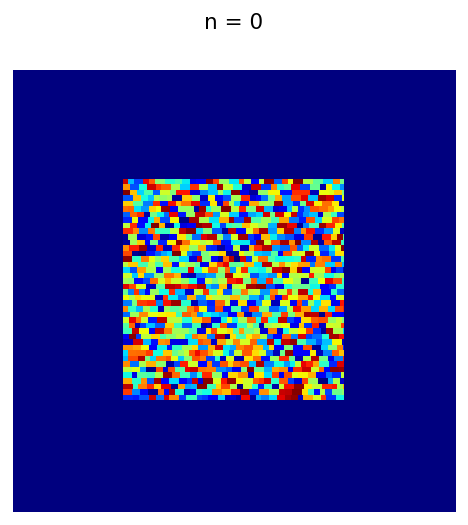

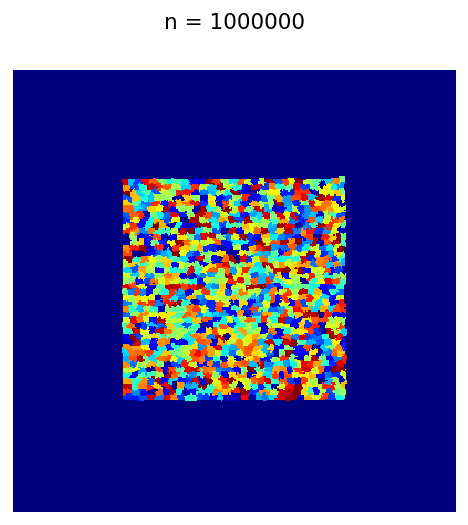

KeyboardInterrupt: 

In [139]:
# for i in [-1, 0, 1]:
Cellular_Potts(n_steps=10000000).run()